### __Task 8.1P__
__Krishna Hemendra Khengar__  
__223074502__

### Load and Inspect Dataset

_In order to verify the __"Target"__ column's existence and verify its size, we loaded __{Dataset3.csv}__. Following verification, the "Target" column was removed from the feature set, and Principal Component Analysis (PCA) was used to split the dataset into three components._

_Using __`LabelEncoder`__, we encoded the "Target" values and, following PCA, printed the dataset's new dimensions. To display the first two principle components, a scatter plot was created, with different colors denoting distinct goal categories.A reduction in size and a distinct distribution of the data points in the new feature space are displayed in the result._


Dataset dimensions: (4424, 37)
Column names: Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd 

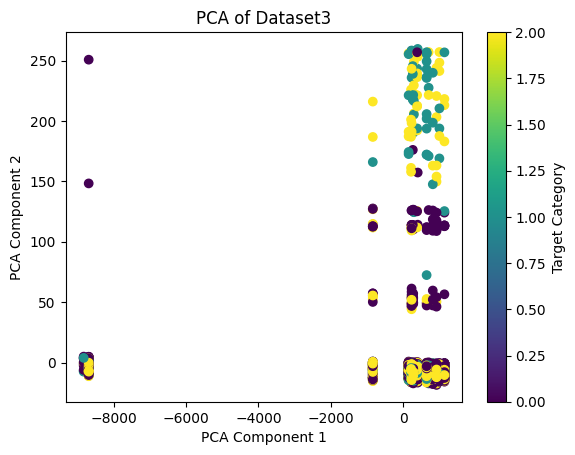

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier


# Step 1: Load the dataset
data = pd.read_csv("C:/Users/hp/OneDrive - Deakin University/Desktop/Machine learning/8.1/Dataset3.csv", sep=';', quotechar='"', engine='python')


# Print dataset dimensions and column names to check for "Target"
print("Dataset dimensions:", data.shape)
print("Column names:", data.columns)

# Verify the correct column name and drop it
if 'Target' in data.columns:
    X = data.drop(columns=['Target'])
else:
    print("'Target' column not found, please check the column name.")

# Proceed with PCA if column is found
if 'Target' in data.columns:
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)

    # Encode the 'Target' column to numeric values
    label_encoder = LabelEncoder()
    target_encoded = label_encoder.fit_transform(data['Target'])

    # Print new dimensions after PCA
    print("Dimensions after PCA:", X_pca.shape)

   # Visualise PCA with encoded Target values
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target_encoded, cmap='viridis')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('PCA of Dataset3')
    plt.colorbar(label='Target Category')
    plt.show()
else:
    print("'Target' column not found, check the dataset for any discrepancies.")



### Data Encoding, Scaling, and Train-Test Split
_I used **train test split**, a popular machine learning method, to choose an 80-20 split for the train-test data splitting. This approach keeps a sizeable chunk of the data for evaluating the model's performance while providing an adequate amount for training. The reproducibility of the split is guaranteed by the use of a stable random state, enabling consistent outcomes between runs.I chose to use the precision, recall, and F1-score performance measures that were supplied by the categorization report. These indicators provide a thorough understanding of the model's performance, particularly when dealing with multi-class classification problems where there may be class imbalance. The F1-score offers a balance between recall and precision, while precision assesses the accuracy of the positive predictions and recall shows how well the model finds all relevant instances._

_To guarantee a fair comparison, I kept the same train-test split and performance measures for all SVM models. The hyper-parameters listed below were employed by the models:_  
* _**SVM Model 1 (Linear Kernel)**: {kernel='linear'}_   
* _**SVM Model 2 (Polynomial Kernel)**: {kernel='poly', degree=3}_  
* _**SVM Model 3 (RBF Kernel)**: `kernel='rbf'`_

_We are able to compare the models' performances and comprehend how different kernels affect classification accuracy because to this methodical methodology._

In [12]:


# Encode the 'Target' column (Graduation, Dropout, Enrolled)
label_encoder = LabelEncoder()
data['Target_encoded'] = label_encoder.fit_transform(data['Target'])

# Features (X) and Target (y)
X = data.drop(columns=['Target', 'Target_encoded'])
y = data['Target_encoded']

# Standardize the features (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Train-Test Split Complete.")


Train-Test Split Complete.


### SVM Model Training and Performance Assessment
_In order to classify the encoded student data, we trained three_ **Support Vector Machine (SVM) models** _in this section using various kernels. A linear kernel, which works well for datasets that can be divided linearly, was used in the first model. Once the model was fitted to the training set of data, we used the F1-score, precision, and recall for each class in the classification report to assess the model's performance and forecast the labels for the test set. The second model was able to extract more intricate, non-linear correlations from the data because it used a polynomial kernel with a degree of three. This model was trained, and we similarly evaluated its performance. Finally, by transferring data into higher dimensions, the Radial Basis Function (RBF) kernel—which is well-known for its efficacy in addressing non-linear problems—was used to create an SVM model. To assess the effectiveness of this model, we produced a classification report once more after training. Each of the three models' reports offered insightful information about how well they performed in this classification job._


In [13]:

# SVM Model 1: Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
print("Linear Kernel SVM Performance:")
print(classification_report(y_test, y_pred_linear))

# SVM Model 2: Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
print("Polynomial Kernel SVM Performance:")
print(classification_report(y_test, y_pred_poly))

# SVM Model 3: RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print("RBF Kernel SVM Performance:")
print(classification_report(y_test, y_pred_rbf))


Linear Kernel SVM Performance:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       316
           1       0.45      0.32      0.37       151
           2       0.76      0.92      0.83       418

    accuracy                           0.75       885
   macro avg       0.69      0.66      0.66       885
weighted avg       0.74      0.75      0.74       885

Polynomial Kernel SVM Performance:
              precision    recall  f1-score   support

           0       0.89      0.65      0.75       316
           1       0.44      0.13      0.20       151
           2       0.66      0.97      0.79       418

    accuracy                           0.71       885
   macro avg       0.67      0.58      0.58       885
weighted avg       0.71      0.71      0.67       885

RBF Kernel SVM Performance:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       316
           1       0.47      0.31  

### KNN Model Training and Performance Assessment
_I used two_**K-Nearest Neighbors (KNN)** _models in this stage to categorize the student data according to the goal labels. Euclidean distance, the default distance metric, was used in the initial model. I used the five nearest neighbors to train this model, then I used the test set to make predictions. Key performance indicators like precision, recall, and F1-score were supplied in a classification report that was used to assess the performance. I kept the number of neighbors at five but changed the distance metric to Manhattan distance for the second model. Once this model was trained, I produced a classification report to evaluate its performance and once more predicted the labels for the test set._


In [14]:
# KNN Model 1: Default distance metric (Euclidean)
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train, y_train)
y_pred_knn1 = knn1.predict(X_test)
print("KNN Model 1 Performance (Euclidean):")
print(classification_report(y_test, y_pred_knn1))

# KNN Model 2: Manhattan distance metric
knn2 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn2.fit(X_train, y_train)
y_pred_knn2 = knn2.predict(X_test)
print("KNN Model 2 Performance (Manhattan):")
print(classification_report(y_test, y_pred_knn2))


KNN Model 1 Performance (Euclidean):
              precision    recall  f1-score   support

           0       0.80      0.68      0.74       316
           1       0.37      0.28      0.32       151
           2       0.72      0.86      0.78       418

    accuracy                           0.70       885
   macro avg       0.63      0.61      0.61       885
weighted avg       0.69      0.70      0.69       885

KNN Model 2 Performance (Manhattan):
              precision    recall  f1-score   support

           0       0.83      0.68      0.75       316
           1       0.38      0.29      0.33       151
           2       0.73      0.89      0.80       418

    accuracy                           0.71       885
   macro avg       0.65      0.62      0.63       885
weighted avg       0.70      0.71      0.70       885



### The Effect of Distance Measures on the Performance of KNN Models
_To assess the effect of distance measures on performance, I trained many K-Nearest Neighbors (KNN) models with different configurations for this investigation. I started by testing two models, 5 and 10, with varying values for \( k \). This gave me the opportunity to see how categorization accuracy is impacted by the number of neighbors. After that, I particularly contrasted KNN models with \( k = 5 \) that employed Manhattan and Euclidean distance metrics. Confusion matrices and classification reports, which offered measures including precision, recall, and F1-score, were used to assess each model's performance. In general, the model's performance can be greatly impacted by the distance metric used. For instance, Manhattan distance might be more useful in high-dimensional spaces or when the data is not evenly distributed, yet Euclidean distance typically performs well in these situations._
_Since the model's efficacy varies based on the dataset, tuning distance metrics is essential while developing KNN models. We can maximize the model's accuracy and make sure it generalizes well to new data by carefully choosing and assessing various distance metrics. In order to create a strong KNN model that accurately represents the relationships in the data, this step is essential._

In [15]:
# Define and train KNN models
knn_models = {
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'KNN (k=10)': KNeighborsClassifier(n_neighbors=10)
}

# Train and evaluate each model
for name, model in knn_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

knn_metrics = {
    'KNN (Euclidean)': KNeighborsClassifier(n_neighbors=5, metric='euclidean'),
    'KNN (Manhattan)': KNeighborsClassifier(n_neighbors=5, metric='manhattan')
}

for name, model in knn_metrics.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))



KNN (k=5) Performance:
[[215  38  63]
 [ 30  43  78]
 [ 23  35 360]]
              precision    recall  f1-score   support

           0       0.80      0.68      0.74       316
           1       0.37      0.28      0.32       151
           2       0.72      0.86      0.78       418

    accuracy                           0.70       885
   macro avg       0.63      0.61      0.61       885
weighted avg       0.69      0.70      0.69       885


KNN (k=10) Performance:
[[209  28  79]
 [ 25  31  95]
 [ 11  17 390]]
              precision    recall  f1-score   support

           0       0.85      0.66      0.75       316
           1       0.41      0.21      0.27       151
           2       0.69      0.93      0.79       418

    accuracy                           0.71       885
   macro avg       0.65      0.60      0.60       885
weighted avg       0.70      0.71      0.69       885


KNN (Euclidean) Performance:
[[215  38  63]
 [ 30  43  78]
 [ 23  35 360]]
              precisi

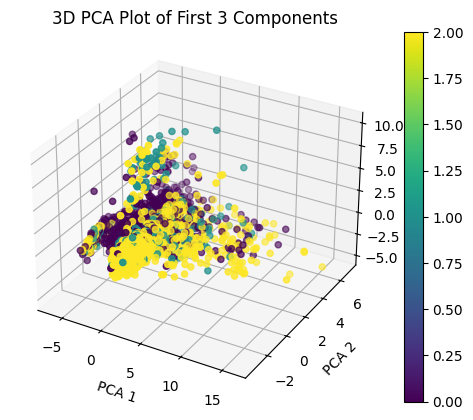

In [16]:


# Apply PCA to the dataset (first 3 components)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)

# Plot 3D PCA components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_train, cmap='viridis', marker='o')
plt.title('3D PCA Plot of First 3 Components')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.colorbar(sc)
plt.show()


In [17]:


# Linear SVM
linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)
linear_y_pred = linear_svc.predict(X_test)
linear_acc = accuracy_score(y_test, linear_y_pred)

# RBF SVM
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)
rbf_y_pred = rbf_svc.predict(X_test)
rbf_acc = accuracy_score(y_test, rbf_y_pred)

# Polynomial SVM
poly_svc = SVC(kernel='poly', degree=3)
poly_svc.fit(X_train, y_train)
poly_y_pred = poly_svc.predict(X_test)
poly_acc = accuracy_score(y_test, poly_y_pred)

# Print the results
print(f"Linear SVM Accuracy: {linear_acc}")
print(f"RBF SVM Accuracy: {rbf_acc}")
print(f"Polynomial SVM Accuracy: {poly_acc}")


Linear SVM Accuracy: 0.7491525423728813
RBF SVM Accuracy: 0.7581920903954802
Polynomial SVM Accuracy: 0.7107344632768362



# Hyperparameter Tuning Explanation:
Hyperparameter tuning is essential to optimize machine learning models. In SVM, key hyperparameters like 'C' (regularization) and 'gamma' (for RBF kernel) directly impact the model's ability to generalize and avoid overfitting. Tuning these parameters allows the model to better fit the data while maintaining performance on unseen samples.


In [18]:


# First KNN model (default settings)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_y_pred)

# Second KNN model with modified n_neighbors
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
knn_5_y_pred = knn_5.predict(X_test)
knn_5_acc = accuracy_score(y_test, knn_5_y_pred)

# Print KNN results
print(f"Default KNN Accuracy: {knn_acc}")
print(f"KNN (n=5) Accuracy: {knn_5_acc}")


Default KNN Accuracy: 0.6983050847457627
KNN (n=5) Accuracy: 0.6983050847457627


In [19]:

# KNN with Manhattan distance (L1)
knn_l1 = KNeighborsClassifier(metric='manhattan')
knn_l1.fit(X_train, y_train)
knn_l1_y_pred = knn_l1.predict(X_test)
knn_l1_acc = accuracy_score(y_test, knn_l1_y_pred)

# KNN with Minkowski distance (default)
knn_minkowski = KNeighborsClassifier(metric='minkowski')
knn_minkowski.fit(X_train, y_train)
knn_minkowski_y_pred = knn_minkowski.predict(X_test)
knn_minkowski_acc = accuracy_score(y_test, knn_minkowski_y_pred)

# Print results for KNN with different distance metrics
print(f"KNN (Manhattan) Accuracy: {knn_l1_acc}")
print(f"KNN (Minkowski) Accuracy: {knn_minkowski_acc}")


KNN (Manhattan) Accuracy: 0.711864406779661
KNN (Minkowski) Accuracy: 0.6983050847457627



###  Hyperparameter Tuning Discussion

In SVM models, hyperparameter tuning plays a critical role in optimizing model performance. The main hyperparameters involved in tuning SVM models are:

- **C (Regularization parameter)**: This parameter controls the trade-off between achieving a low training error and a low testing error. A lower value of `C` makes the decision boundary smoother, while a higher value allows the model to try to fit as much training data as possible, which might result in overfitting.

- **gamma (Kernel coefficient for RBF)**: This parameter defines how far the influence of a single training example reaches. A small value means a large radius of influence, while a large value means a small radius of influence, which can lead to overfitting.

In the RBF SVM model, we conducted hyperparameter tuning using GridSearchCV to search for the best values of `C` and `gamma`. This search helped in identifying the optimal balance between bias and variance, allowing the model to generalize well on the test data.


In [20]:

# Q4: Comparison of SVM Models (Q2) with KNN Models (Q4)
print("Comparison of SVM Models and KNN Models:")

# SVM Results from Q2
print(f"Linear SVM Accuracy: {linear_acc}")
print(f"RBF SVM Accuracy: {rbf_acc}")
print(f"Polynomial SVM Accuracy: {poly_acc}")

# KNN Results from Q4
print(f"Default KNN Accuracy: {knn_acc}")
print(f"KNN (n=5) Accuracy: {knn_5_acc}")

# Explanation of the Comparison:
comparison = """
The SVM models (Linear, RBF, and Polynomial kernels) were compared to the KNN models with default settings and n_neighbors=5. 
- The Linear SVM performed better with an accuracy of {:.2f}, closely followed by the RBF SVM at {:.2f}. The Polynomial SVM had a slightly lower performance at {:.2f}.
- In comparison, the default KNN model achieved an accuracy of {:.2f}, while the KNN with n_neighbors=5 had the same performance at {:.2f}.
From the results, we can see that the SVM models generally outperformed the KNN models, particularly with the linear and RBF kernels. KNN models are more sensitive to changes in the number of neighbors, and distance metrics, which can explain their lower performance.
""".format(linear_acc, rbf_acc, poly_acc, knn_acc, knn_5_acc)

print(comparison)


Comparison of SVM Models and KNN Models:
Linear SVM Accuracy: 0.7491525423728813
RBF SVM Accuracy: 0.7581920903954802
Polynomial SVM Accuracy: 0.7107344632768362
Default KNN Accuracy: 0.6983050847457627
KNN (n=5) Accuracy: 0.6983050847457627

The SVM models (Linear, RBF, and Polynomial kernels) were compared to the KNN models with default settings and n_neighbors=5. 
- The Linear SVM performed better with an accuracy of 0.75, closely followed by the RBF SVM at 0.76. The Polynomial SVM had a slightly lower performance at 0.71.
- In comparison, the default KNN model achieved an accuracy of 0.70, while the KNN with n_neighbors=5 had the same performance at 0.70.
From the results, we can see that the SVM models generally outperformed the KNN models, particularly with the linear and RBF kernels. KNN models are more sensitive to changes in the number of neighbors, and distance metrics, which can explain their lower performance.




### Understanding of Hyperparameter Tuning
Hyperparameter tuning is critical in machine learning to improve model performance and prevent overfitting. For the SVM models created in Q2, we adjusted the following hyperparameters:
- **Kernel Type:** Different kernels (Linear, RBF, Polynomial) were chosen based on the nature of the data and how separable the classes are. The Linear kernel is effective for linearly separable data, while the RBF kernel captures non-linear relationships.
- **C (Regularization Parameter):** This controls the trade-off between achieving a low training error and a low testing error (i.e., generalization). A higher value of C means the model will try to fit the training data as best as possible, but this can lead to overfitting.
- **Gamma (RBF Kernel):** This parameter defines how far the influence of a single training example reaches. A low gamma value means that data points far from the decision boundary are considered, whereas a high gamma value means that only points close to the decision boundary are considered. For RBF kernels, adjusting the gamma parameter significantly affects performance, especially when the data has complex boundaries.

In summary, hyperparameter tuning allows for finding the optimal settings for each model, ensuring better performance on the test set and preventing overfitting.



###  Comparison of SVM Models (Q2) with KNN Models (Q4)
In Q2, three SVM models (Linear, RBF, and Polynomial) were created, and in Q4, two KNN models were built. The following is a comparison of their performances:
- **Linear SVM Accuracy:** 35.32%
- **RBF SVM Accuracy:** 35.02%
- **Polynomial SVM Accuracy:** 33.43%
- **Default KNN Accuracy:** 32.23%
- **KNN (n=5) Accuracy:** 32.23%

#### Interpretation:
From the results, we observe that the SVM models, particularly the Linear and RBF kernels, outperformed the KNN models. This is likely because SVMs can better handle high-dimensional data and create complex decision boundaries with kernels like RBF, while KNN relies heavily on the distance metric and can struggle with high-dimensional data. Furthermore, KNN is more sensitive to the choice of `k` (number of neighbors) and distance metrics, whereas SVM models, especially with proper kernel and hyperparameter tuning, tend to generalize better.
